In [2]:
import pandas as pd
import numpy as np
import random

In [2]:
from itertools import product
import gensim
import pickle

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

## Fourth Patient Set (obese females)

In [4]:
#load patient vectors from HMP-T2D
vec_p1 = pickle.load(open("ob_vec_p1.p", "rb"))
vec_p2 = pickle.load(open("ob_vec_p2.p", "rb"))
vec_p3 = pickle.load(open("ob_vec_p3.p", "rb"))
vec_p4 = pickle.load(open("ob_vec_p4.p", "rb"))

In [5]:
#a vector (length 10) for each sequence that is an average of all 6 'versions' of that sequence
#should be equal to number of original reads per patient
print('Vectors in P1:', len(vec_p1))
print('Vectors in P2:', len(vec_p2))
print('Vectors in P3:', len(vec_p3))
print('Vectors in P4:', len(vec_p4))

Vectors in P1: 16399
Vectors in P2: 28049
Vectors in P3: 30063
Vectors in P4: 33181


## PCA

In [10]:
X = np.concatenate((vec_p1, vec_p2, vec_p3, vec_p4))
y = np.concatenate((np.ones(16399), np.full(28049, 2), np.full(30063, 3), np.full(33181, 4)))

In [11]:
# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=2)
pca.fit(X)
pcafeatures_train = pca.transform(X)

In [12]:
# Create a plot of the PCA results
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend()

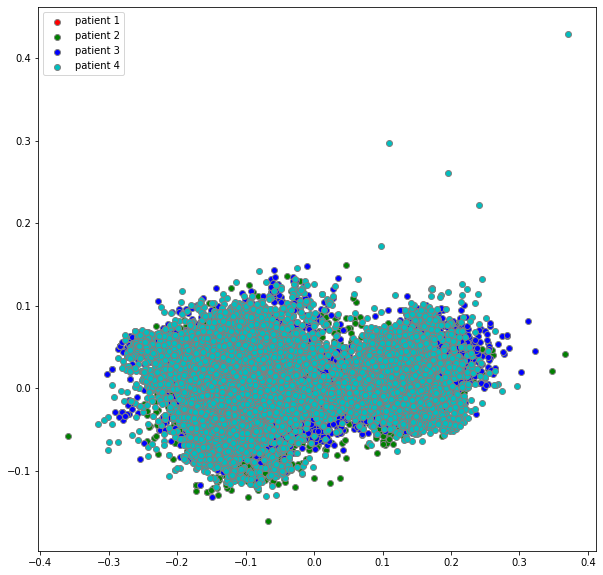

In [13]:
# plot PC1 vs PC2 of all the sequences
plot_PCA_2D(pcafeatures_train, target=y, target_names=['patient 1', 'patient 2', 'patient 3', 'patient 4'])

## Clustering

### MeanShift

In [14]:
X = np.concatenate((vec_p1, vec_p2, vec_p3, vec_p4))
y = np.concatenate((np.ones(29379), np.full(28329, 2), np.full(22485, 3), np.full(13821, 4)))

In [15]:
# estimate bandwidth 
bandwidth = estimate_bandwidth(cluster_p1, quantile=0.4, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

NameError: name 'cluster_p1' is not defined

In [16]:
plot_PCA_2D(pcafeatures_train, target=labels, target_names=['cluster' + str(x+1) for x in range(n_clusters_)])

NameError: name 'labels' is not defined

In [21]:
cluster_centers

array([[-0.51143795,  0.6925811 , -0.5718237 , -0.57003933,  0.7740009 ,
         0.6475506 , -0.45654902,  0.04843059,  0.60572904,  0.48809707],
       [-0.4390063 ,  0.56485265, -0.4549197 , -0.49786037,  0.661549  ,
         0.60302997, -0.4471773 ,  0.05817059,  0.54102755,  0.44037068],
       [-0.658891  ,  0.62697905, -0.12951982, -0.48541665,  0.5262368 ,
         0.66685456, -0.14781897,  0.15898329,  0.42033204,  0.36508548],
       [-0.31347334,  0.554246  , -0.56251514, -0.3830982 ,  0.5854267 ,
         0.5580742 , -0.35885322,  0.10637879,  0.5304577 ,  0.35744146],
       [-0.51872957,  0.66098005, -0.39469332, -0.5113335 ,  0.6603103 ,
         0.74768704, -0.33479252,  0.12703134,  0.5161132 ,  0.4238264 ],
       [-0.55425733,  0.646637  , -0.24222702, -0.5096577 ,  0.5293952 ,
         0.6430279 , -0.2838495 ,  0.16462627,  0.39362362,  0.40999424],
       [-0.62258714,  0.69863623, -0.24962774, -0.49729425,  0.56119287,
         0.69011813, -0.27840468,  0.12798426

In [ ]:
#find number of points within each cluster
y = np.bincount(labels)
ii = np.nonzero(y)[0]
list(zip(ii,y[ii]))

### Heirarchical

[(0, 5347), (1, 5457), (2, 2050), (3, 2094), (4, 1451)]
[(0, 4253), (1, 3916), (2, 7389), (3, 5066), (4, 7425)]
[(0, 8237), (1, 7323), (2, 4157), (3, 5953), (4, 4393)]
[(0, 6197), (1, 6958), (2, 8856), (3, 2353), (4, 8817)]


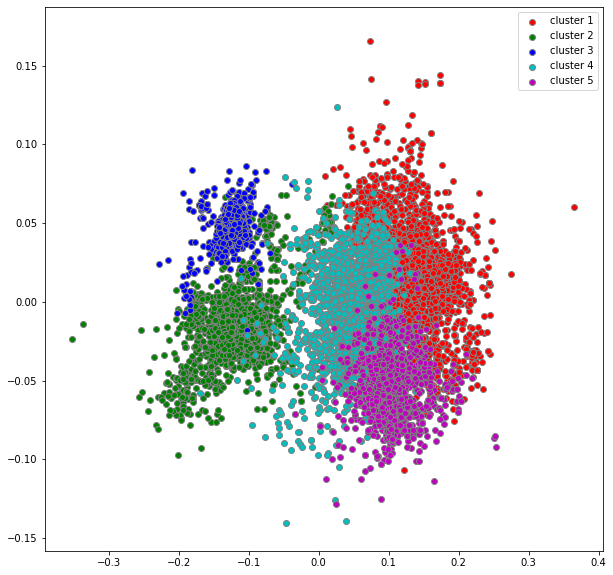

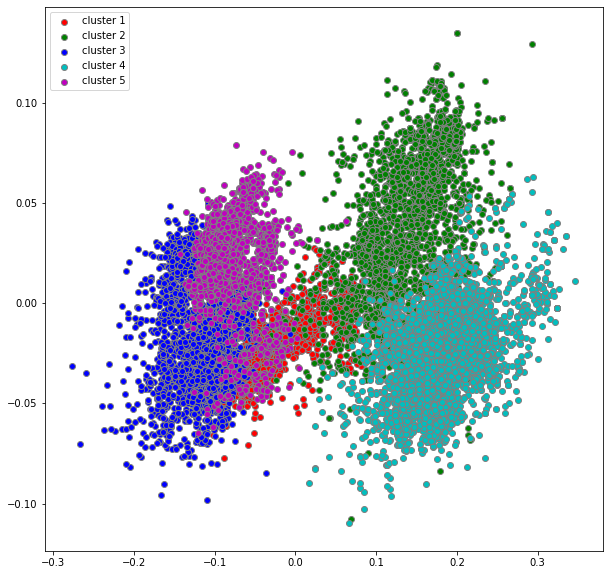

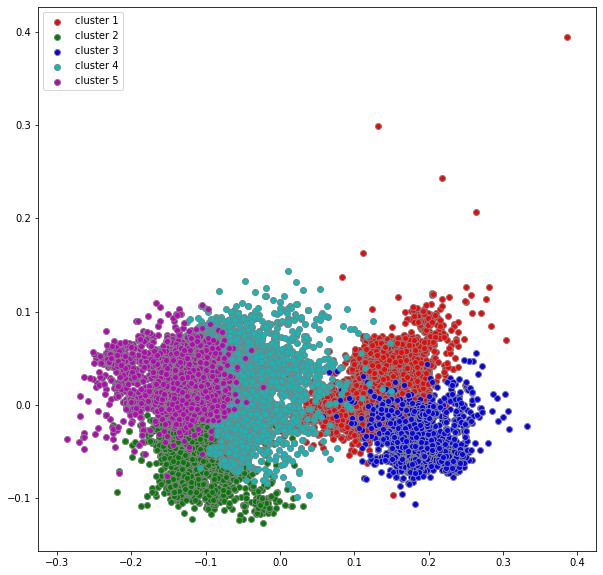

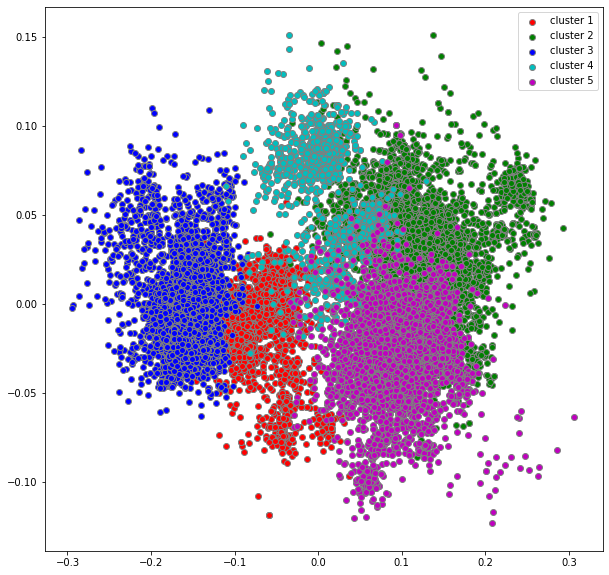

In [17]:
#get cluster labels and determine number of points within each cluster

hc_labels = []
children = []

for ind,patient in enumerate([vec_p1, vec_p2, vec_p3, vec_p4]):
    hc = AgglomerativeClustering(linkage='ward', n_clusters=5)
    hc.fit(patient)
    labels = hc.labels_
    y = np.bincount(labels)
    ii = np.nonzero(y)[0]
    print(list(zip(ii,y[ii])))
    hc_labels.append(labels)
    children.append(hc.children_)
    
    #plot using pc1/pc2
    pca = PCA(n_components=2)
    pca.fit(patient)
    pcafeatures_train = pca.transform(patient)

    plot_PCA_2D(pcafeatures_train, target=hc_labels[ind], 
            target_names=['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])

In [18]:
def find_nearest(vectors, center):
    current_min = (0, 1)
    for i, vector in enumerate(vectors):
        new_min = (i, sum(np.abs(np.subtract(np.asarray(vector), np.asarray(center)))))
        if new_min[1] < current_min[1]:
            current_min = new_min
    return current_min

In [19]:
#find "centers" of agglomerative clustering
#actually it's the average of all points of that cluster in the 10-dim space
#find_nearest returns the vector that is "nearest" to the determined "center"
def find_center(labels, num_clusters, vectors):
    hc_centers = []
    actual_centers = []
    for clust in range(num_clusters):
        clust_ind = [i for i, x in enumerate(labels) if x == clust]
        vec_ind = [vectors[i] for i in clust_ind]
        hc_centers.append(sum(vec_ind)/len(clust_ind))
    
    for center in hc_centers:
        actual_centers.append(find_nearest(vectors, center))
    return actual_centers

In [20]:
#this returns the index and distance from the calculated 'center' of the representative sequences for each cluster
#these can be plugged back into the original data in order to BLAST the representative sequences to interpret species 
for ind, patient in enumerate([vec_p1, vec_p2, vec_p3, vec_p4]):
    cents = find_center(hc_labels[ind], 5, patient)
    print('Centers for Patient', ind+1)
    print(cents)

Centers for Patient 1
[(14246, 0.06504803150892258), (8600, 0.029747888445854187), (0, 0.010568762198090553), (15314, 0.08075452968478203), (3421, 0.05469071865081787)]
Centers for Patient 2
[(10570, 0.05592283234000206), (4419, 0.07680130377411842), (4409, 0.044677987694740295), (23150, 0.057194970548152924), (4023, 0.014913123100996017)]
Centers for Patient 3
[(22607, 0.05512777715921402), (9969, 0.042689185589551926), (18483, 0.04836706817150116), (6813, 0.06081089377403259), (29413, 0.04664850980043411)]
Centers for Patient 4
[(12149, 0.07815047726035118), (30235, 0.06281939148902893), (8978, 0.06817267462611198), (29145, 0.038928987458348274), (25546, 0.046729233115911484)]
